<a href="https://colab.research.google.com/github/edgeofchaos42/ComplexityExplorer/blob/main/Session_4_Upload_the_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1- Review the Structure

Script Notes: 

In lesson three we set up our basic structures

First we install mesa and import our depedencies. 

Second we initialized our classes (show as you discuss) 

First there is the sugar class, then spice, then the trader and finally the manager class which is SugarscapeG1mt. 

we then have a cell to initialize and run the model. 

In [ ]:
pip install mesa

In [ ]:
import mesa
#part 2
import numpy as np

#part 3
import matplotlib.pyplot as plt



%matplotlib inline 

In [ ]:
class Sugar(mesa.Agent):
    """
    Sugar is a FSM that
    - contains an amount of sugar
    - grows 1 amount of sugar at each turn (Epstein's rule G1).
    """
    
    
    def __init__(self):
        print("I am a Sugar")

In [ ]:
class Spice(mesa.Agent):
    """
    Spice is a FSM that
    - contains an amount of spice
    - grows 1 amount of spice at each turn.
    """

    def __init__(self):
      print("I am Spice")
       

In [ ]:
class Trader(mesa.Agent):
    """
    TraderAgent is a 
    - has a metabolism for sugar and spice
    - harvest and trades sugar and spice to survive and thrive
    """

    def __init__(self):
      print("I am a Trader")

## 2 Read in the Sugar and Spice

Now we need to create a grid on which the sugar and spice can live and read in the values of the landscape. 

---
**Part 1**: 
Following Growing Artificial Societies, we will initiate a grid of 50 by 50 or 2500 grid cells. 

Following Mesa convention we will start with width (x-axis) and then height (y-axis). As this can be a parameter as well we will initiate the grid as a key word argument.

---

**Part 2**
We will then need a space for the sugar and spice agents to go. To do this will initiate Mesa's multigrid. Multigrid allows multiple agents to be in a cell at a time so this will allow sugar agents, spice agents and traders all to be on the same space. 

Mesa also has a key word argument for whether or not the grid folds back on itself, if an agent is on the top row it can go to the bottom row, or if an agent is on the left column it can go to the right column. This shape looks like a donut but is technically called a torus. Per Growing Artificial Societies we are going to set this to False. 

Mesa has 5 types of space as well as a geospatial package which is is a seperate library [mesa-geo](https://github.com/projectmesa/mesa-geo)

The 5 spaces are:
- `SingleGrid` -- only one agent in a grid cell at a time
- `MultiGrid` -- many agents can be in a cell
- `HexGrid` -- which has 6 sided cells vs 4
- `ContinousSpace` -- where each agent can have an arbitrary position
- `NetworkGrid` -- where agents exists on a network

We need a 3D space if anyone is interested in helping us and contrubting to Mesa is the plan for the advanced tutorial if you arienterested in open source development. 

As with all Mesa code you can go explore it the [multigrid space](https://github.com/projectmesa/mesa/blob/a2afbdb40a6f39e2781b30e0de6968ea3090fe38/mesa/space.py#L537). 

---
**Part 3:**
Now that we have a place for the sugar and spice to go we need to read in the terrain. The fille to create the landscpae is located on [complexity explorer files tab](https://www.complexityexplorer.org/courses/157-mesa-abm/segments/15542). 

To read in this file first we need to: 

1. Import numpy so let us go to our imports cell
2. Locally upload the folder
3. read in
4. see the data structure
5. Flip the distribution to get the spice


---
**Part 4:** Validate the distribution is what we want

1. import matplotib
2. plot the distribution
3. Switch the origin
4. plot the spice



In [ ]:
class SugarscapeG1mt(mesa.Model):

  def __init__(self, width=50, height=50): 
    
    #Set parameters: Part 1
    self.width = width
    self.height = height

    #Initiate Grid: Part 2
    self.grid = mesa.space.MultiGrid(self.width, self.height, torus=False)

    #Part 3 read in file: 
    sugar_distribution = np.genfromtxt("sugar-map.txt") 
    #show data structure
    print(sugar_distribution.shape) #delete later
    print(sugar_distribution[30]) #show different rows
    spice_distribution = spice = np.flip(sugar_distribution,1)
    plt.imshow(spice_distribution, origin="lower") #switch to orign to lower, change to spice
    
    #DELETE
    #Place on grid
    '''
    self.spice = Spice()
    self.sugar = Sugar()
    self.trader = Trader()
    '''

Finally we will create a run cell that will initaite our models or models. 

(50, 50)
[2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3.
 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0.]


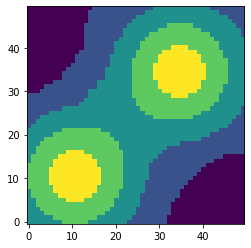

In [ ]:
model = SugarscapeG1mt()